In [174]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import apyori

In [72]:
from konlpy.tag import Kkma
kkma = Kkma()

In [73]:
df = pd.read_csv('hugi.csv',index_col='id')
df.head(5)

,cs
id,
1,먹는 내내 아찔한 느낌이 사라지질 않습니다 제가 찾던 맛있는 매운 맛이 여기...
2,누린내도 안나고 막장도 넉넉하게 주셔서 좋았어요 너무 맛있어요 데마워요! 고마시안샵
3,유산균을 꽤나 오랫동안 복용했었는데요 약이라는게 먹을때는 모르다가 안먹으면 왜 먹...
4,이거 너무 맛있어요 순한맛도 맵다기에 맵찔이라 두 팩만 주문했는데 과거의 나는 반...
5,아니 맛은 있고 식감도 좋아요 근데 포장에 그려진 토끼가 귀여워서 샀는데 박스가 서...


In [163]:

f = open("hugi.csv",'r',encoding='utf-8')
lines = f.readlines()
f.close()


In [75]:
dataset = []     


for i in range(len(lines)):
    dataset.append(kkma.nouns(lines[i]))
    
dataset = [[y for y in x if not len(y)==1] for x in dataset]
dataset = [[y for y in x if not y.isdigit()]for x in dataset]

dataset[:5]

[[],
 ['느낌', '사라지', '제가', '여기', '데마워', '고마시안샵'],
 ['누린내', '막장', '데마워', '고마시안샵'],
 ['유산균',
  '오랫동안',
  '복용',
  '회사',
  '추천',
  '비타민',
  '비타민엔젤스로',
  '엔젤',
  '스로',
  '구입',
  '만족',
  '가격',
  '약크기',
  '크기'],
 ['이거', '맵찔', '주문', '과거', '반성', '반성중', '재주', '재주문']]

In [76]:
!pip install apyori pip

In [77]:
from apyori import apriori

In [162]:
result = (list(apriori(dataset,min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x : len(x))
df = df[(df['length']== 2) & 
                    (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head()

,items,support,ordered_statistics,length
401,"(배송, 주문)",0.049924,"[((), (배송, 주문), 0.049924357034795766, 1.0), ((...",2
487,"(정도, 주문)",0.039334,"[((), (정도, 주문), 0.039334341906202726, 1.0), ((...",2
498,"(주문, 제품)",0.036309,"[((), (주문, 제품), 0.036308623298033284, 1.0), ((...",2
438,"(주문, 생각)",0.034796,"[((), (주문, 생각), 0.03479576399394856, 1.0), ((생...",2
435,"(정도, 생각)",0.033283,"[((), (정도, 생각), 0.03328290468986384, 1.0), ((생...",2


In [79]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [80]:
pr = nx.pagerank(G)

In [123]:

nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [110]:
import matplotlib

In [111]:
import matplotlib.font_manager as fm

In [153]:
fm.get_fontconfig_fonts()
font_location = 'C:\jupyter/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [118]:
%matplotlib inline

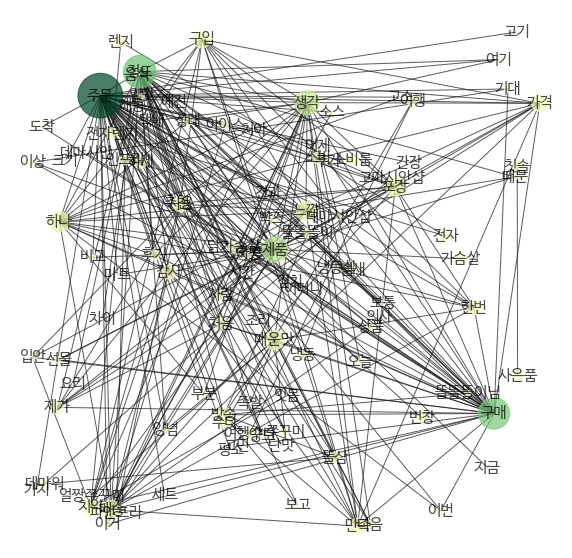

In [155]:
pos = nx.random_layout(G)
plt.figure(figsize=(10,10)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7,edge_color='.1',cmap=plt.cm.YlGn)


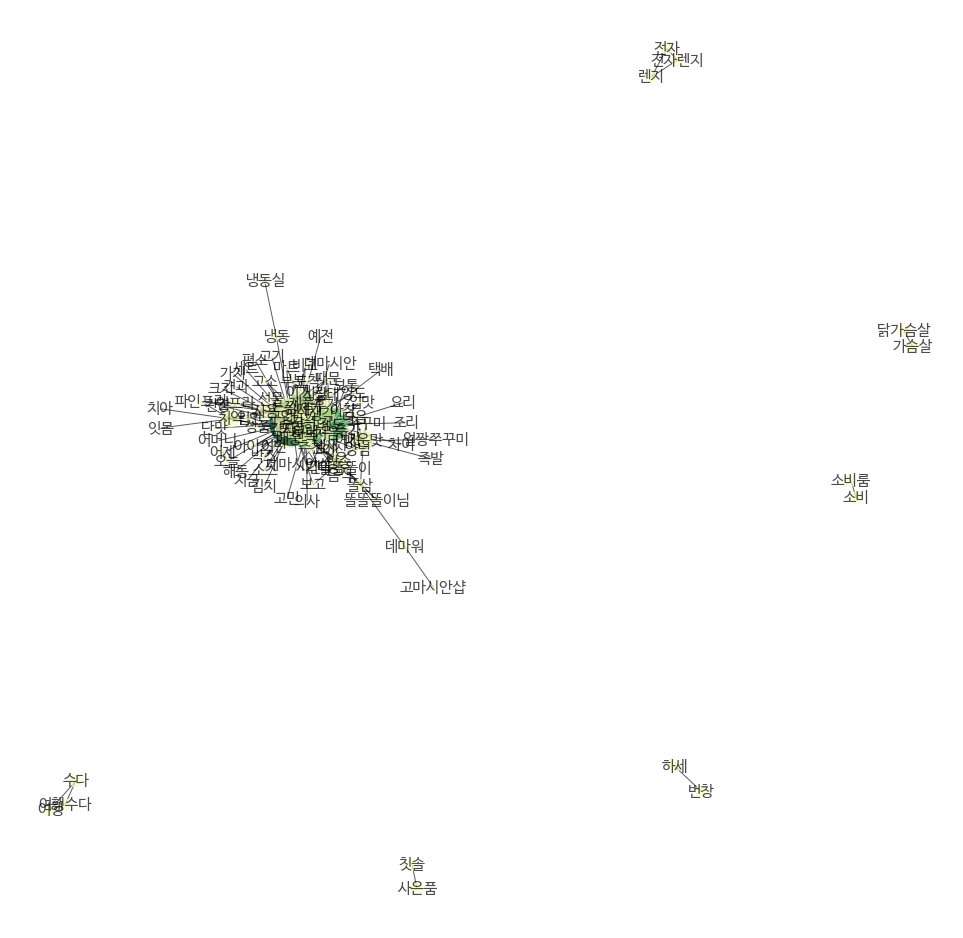

In [159]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(17,17)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7,edge_color='.1',cmap=plt.cm.YlGn)

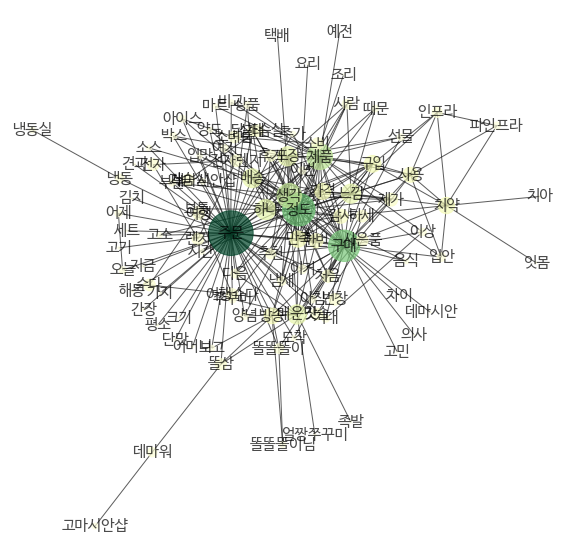

In [160]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10,10)); plt.axis('off')
nx.draw_networkx(G,font_family='NanumBarunGothic', font_size=15,
                 pos=pos, node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7,edge_color='.1',cmap=plt.cm.YlGn)

In [6]:
! pip install Mlxtend pip

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
#te = TransactionEncoder()
#te_ary = te.fit(dataset).transform(dataset)
#df = pd.DataFrame(te_ary, columns=te.columns_) 

In [9]:
#df.head(5)

In [10]:
#frequent_itemsets = apriori(df,min_support=0.05)
#frequent_itemsets

In [11]:
! pip install gensim

In [12]:
from gensim.models.word2vec import Word2Vec

In [13]:
model = Word2Vec(dataset,
                 sg=1,
                 window=5,
                 min_count=1           
                )
model.init_sims(replace=True)

In [14]:
print("방송과 결제 단어간 유사도는 %.2f " %(model.wv.similarity('방송','결제')))

방송과 결제 단어간 유사도는 0.84 


In [15]:
df = pd.DataFrame(model.wv.most_similar("구매",topn=200),columns=['단어','유사도'])

df.head(10)

,단어,유사도
0,주문,0.992968
1,구입,0.992110
2,생각,0.992009
3,정도,0.991920
4,느낌,0.991624
5,하나,0.991200
6,가격,0.990364
7,제품,0.990275
8,처음,0.990108
9,배송,0.990019


In [16]:
keyword = ['데마시안','만족','똘똘똘이','방송','결제','재주문','주문']
df = df[df['단어'].isin(keyword)]

df

,단어,유사도
0,주문,0.992968
16,만족,0.986570
34,데마시안,0.982681
51,방송,0.978083
137,똘똘똘이,0.942931


In [28]:
df1 = pd.DataFrame(model.wv.most_similar(df.iloc[0]['단어'],topn=50),columns=['단어',df.iloc[0]["단어"]])
df2 = pd.DataFrame(model.wv.most_similar(df.iloc[1]['단어'],topn=50),columns=['단어',df.iloc[1]["단어"]])
df3 = pd.DataFrame(model.wv.most_similar(df.iloc[2]['단어'],topn=50),columns=['단어',df.iloc[2]["단어"]])
df4 = pd.DataFrame(model.wv.most_similar(df.iloc[3]['단어'],topn=50),columns=['단어',df.iloc[3]["단어"]])
df5 = pd.DataFrame(model.wv.most_similar(df.iloc[4]['단어'],topn=50),columns=['단어',df.iloc[4]["단어"]])


dfs = [df.set_index(['단어']) for df in [df1,df2,df3,df4,df5]]
df5 = pd.concat(dfs,join='inner',axis=1).reset_index()
df5

,단어,주문,만족,데마시안,방송,똘똘똘이
0,생각,0.993355,0.984236,0.983405,0.976374,0.939633
1,구매,0.992968,0.986570,0.982681,0.978083,0.942931
2,제품,0.992689,0.984490,0.981870,0.976377,0.937439
3,구입,0.992354,0.984126,0.982380,0.977442,0.934085
4,하나,0.992221,0.985276,0.981372,0.976611,0.937583
5,느낌,0.991973,0.985843,0.982209,0.978808,0.945472
6,정도,0.991784,0.984559,0.981055,0.979319,0.937278
7,배송,0.991078,0.982462,0.978580,0.970265,0.939148
8,가격,0.990417,0.984115,0.979911,0.974814,0.935551
9,사용,0.990013,0.982679,0.981894,0.977681,0.941218
